In [1]:
from Assemblies.game import GameField
import numpy as np

from fractions import Fraction

import matplotlib.pyplot as plt
from matplotlib import animation

np.set_printoptions(precision=3)

In [2]:
# init
L = 30
fraction_D = 0.1
b = 1.8

rndm = np.random.RandomState(123)
instance = (rndm.uniform(size=(L, L)) < fraction_D).astype(int)
game = GameField(L, b)
game.field = instance

In [22]:
def draw_field(field, point_size=10, scale=10):
    plt.figure(figsize = (scale*1, scale*0.666))
    point_size = scale / (len(field)**2) * 10000
    
    y, x = (1-field).nonzero()
    c = ['b']*len(x)
    plt.scatter(x + y*np.sin(np.pi/6), y * np.sin(np.pi/3), s=point_size, marker='h')
    y, x = field.nonzero()
    plt.scatter(x + y*np.sin(np.pi/6), y * np.sin(np.pi/3), s=point_size, marker='h', c='r')
    plt.show()

<IPython.core.display.Javascript object>


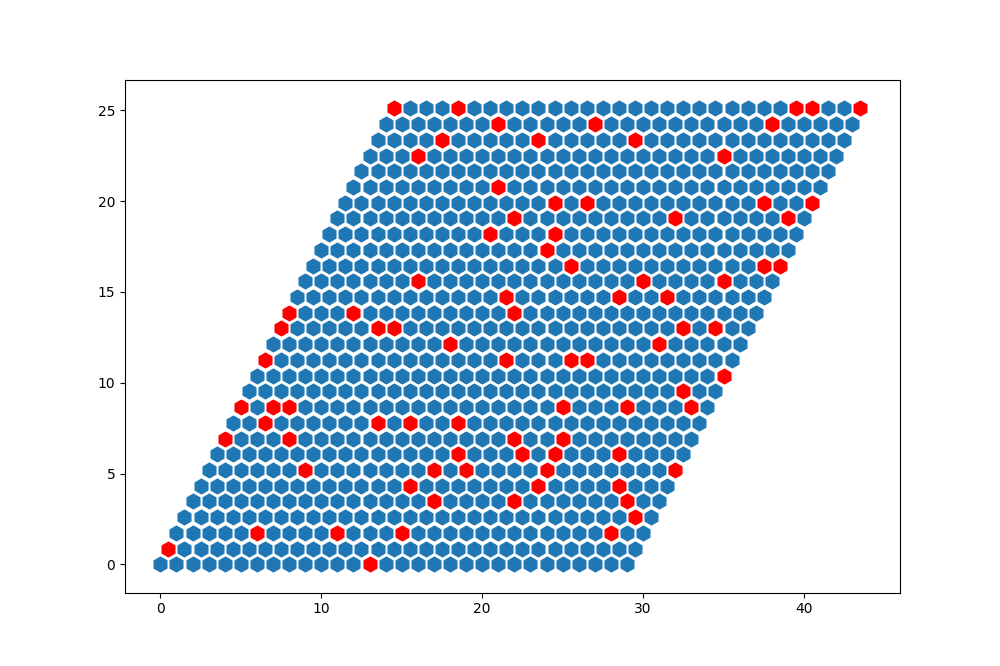

In [23]:
draw_field(game.field)

In [114]:
def draw_field2(field, point_size=10, scale=10):
    plt.figure(figsize = (scale*1, scale*0.666))
    point_size = scale / (len(field)**2) * 10000
    
    y1, x1 = (1-field).nonzero()    
    y2, x2 = field.nonzero()
    
    y = np.hstack((y1, y2))
    x = np.hstack((x1, x2))
    c = ['C0']*len(x1) + ['r']*len(x2)
    #c = [0.1]*len(x1) + [0.9]*len(x2)
    
    plt.scatter(x + y*np.sin(np.pi/6), y * np.sin(np.pi/3), s=point_size, marker='h', c=c)
    plt.show()
    
#draw_field2(game.field)

In [51]:
# init
L = 30
fraction_D = 0.1
b = 1.1

rndm = np.random.RandomState(12345)
instance = (rndm.uniform(size=(L, L)) < fraction_D).astype(int)
game = GameField(L, b)
game.field = instance

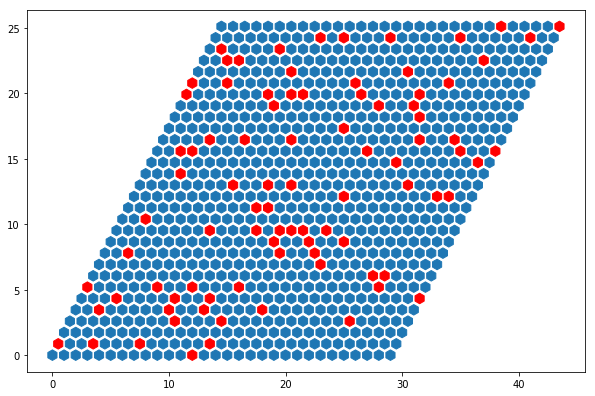

In [52]:
draw_field2(game.field)

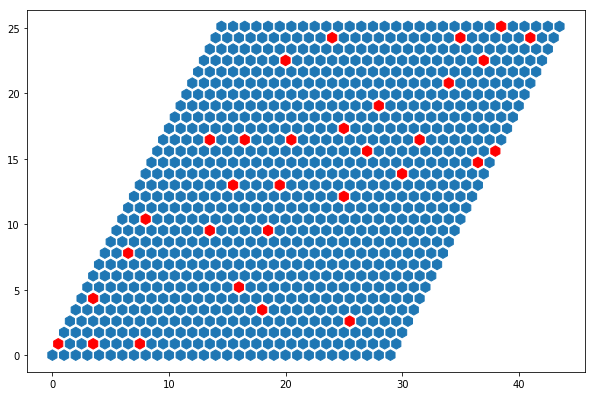

In [53]:
game.evolveT(1000)
draw_field2(game.field)

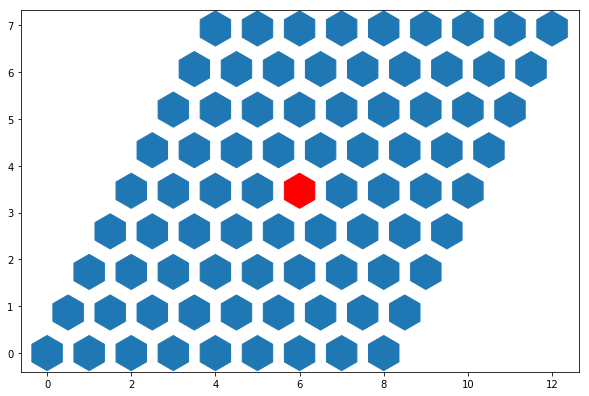

In [110]:
game.evolveT(1)
draw_field2(game.field)

In [140]:
def draw_field4(game, ax=None, point_size=10, scale=10):
    if ax is None:
        fig = plt.figure(figsize = (scale*1, scale*0.666))
        ax = fig.add_subplot(111)
    point_size = scale / (len(field)**2) * 10000
    
    y1, x1 = (1 - game.field).nonzero()    
    y2, x2 = game.field.nonzero()
    
    y = np.hstack((y1, y2))
    x = np.hstack((x1, x2))
    c = ['C0']*len(x1) + ['r']*len(x2)
    #c = [0.1]*len(x1) + [0.9]*len(x2)
    #plt.show()
    
    ax.scatter(x + y*np.sin(np.pi/6), y * np.sin(np.pi/3), s=point_size, marker='h', c=c)

    return ax
#draw_field2(game.field)

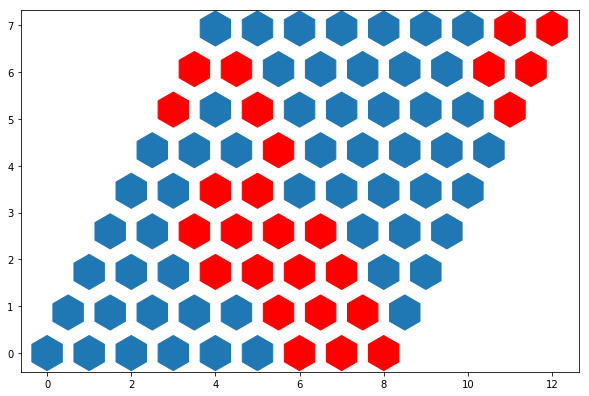

In [147]:
draw_field4(game=game)

In [194]:
############### this should really go to br_utils
def lighten_axes(ax):
    #remove the spines
    for pos in ["right", "left", "top", "bottom"]:
        ax.spines[pos].set_visible(False)

    #tick marks as well
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

    return ax

In [407]:
def draw_field5(game, ax=None, point_size=10, scale=10):
    """Two steps: blue is C, red is D, yellow is C->D, and green is D->C"""
    if ax is None:
        fig = plt.figure(figsize = (scale*1, scale*0.666))
        ax = fig.add_subplot(111)
        ax = lighten_axes(ax)
    point_size = scale / (len(game.field)**2) * 10000
    #point_size = point_size 
    
    prev_field = game.field.copy()
    game.evolveT(1)
    
    c_to_c = (prev_field == 0) & (game.field == 0)
    d_to_d = (prev_field == 1) & (game.field == 1)
    
    c_to_d = (prev_field == 0) & (game.field == 1)
    d_to_c = (prev_field == 1) & (game.field == 0)
    
    y1, x1 = c_to_c.nonzero()    
    y2, x2 = d_to_d.nonzero()
    
    y3, x3 = c_to_d.nonzero()    
    y4, x4 = d_to_c.nonzero()
    
    y = np.hstack((y1, y2, y3, y4))
    x = np.hstack((x1, x2, x3, x4))
    c = ['C0']*len(x1) + ['r']*len(x2) + ['y']*len(x3) + ['C2']*len(x4)
    
    ax.scatter(x + y*np.sin(np.pi/6), y * np.sin(np.pi/3), c=c, marker='h', s=point_size) #, s=point_size, marker='h', c=c)
 
    return ax
#draw_field2(game.field)

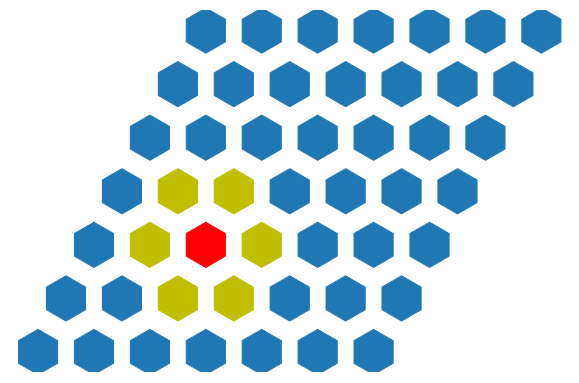

In [350]:
rndm = np.random.RandomState(123)
game = GameField(L=7, b=1.2)
game.field = np.zeros((7, 7), dtype=int)
game.field[2, 2] = 1

draw_field5(game=game)
plt.savefig("seven_D.pdf")

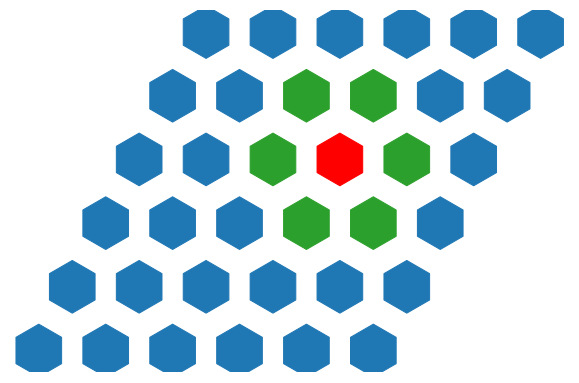

In [347]:
draw_field5(game=game)

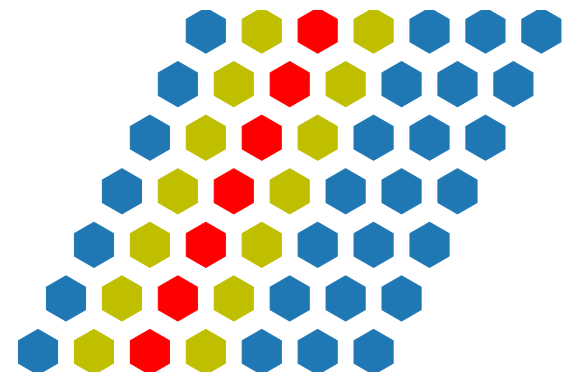

In [368]:
rndm = np.random.RandomState(123)
game = GameField(L=7, b=7/4 + 0.001)
game.field = np.zeros((7, 7), dtype=int)
game.field[:, 2] = 1

draw_field5(game=game)
plt.savefig("straight_line.pdf")

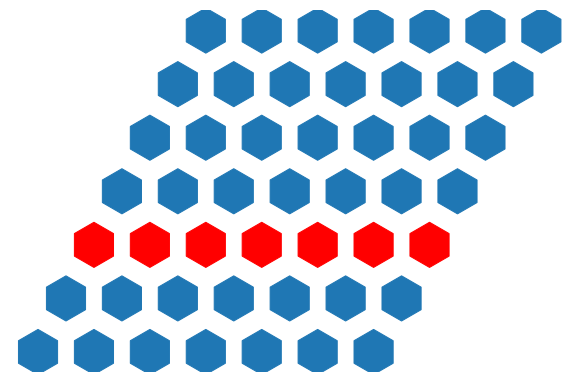

In [362]:
draw_field5(game)

In [162]:
game.evolveT(1)

In [163]:
game.field

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [175]:
7/4

1.75

# Typical snapshots

In [396]:
L=60
fraction_D = 0.1

n_therm = 5000

### $2 < b < 7/3$ : 

Random patterns, mostly static with small flip-flops at the boundaries, which are periodic (below, period=4)

In [419]:
game = GameField(L, b=7/3-0.01)

rndm = np.random.RandomState(12345)
game.field = (rndm.uniform(size=(L, L)) < fraction_D).astype(int)
game.evolveT(n_therm)

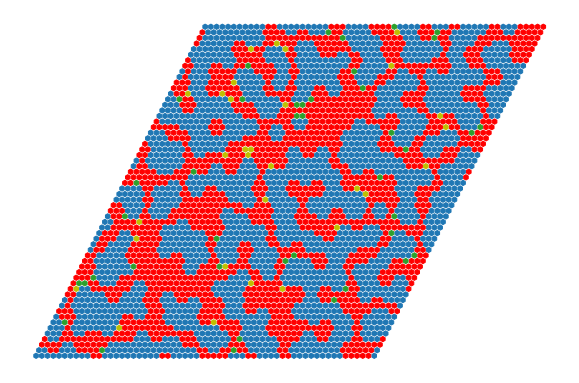

In [420]:
ax = draw_field5(game=game)

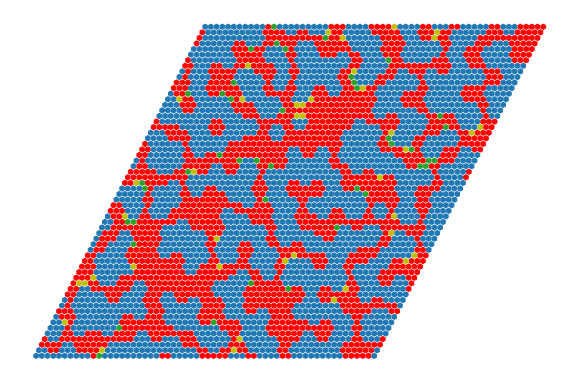

In [421]:
ax = draw_field5(game=game)
#plt.tight_layout()
plt.savefig("triang_b073m.png")

In [328]:
!pwd

/home/br/sweethome/ev_games/spatial-games-triangular-grid/Notebooks


### $7/4 < b < 2$:


Nearly static patterns with small isolated islands of defectors. The islands are thin, wire-like, with the thickness between 1 and 3. Again, the patterns are periodic with periods of the order of unity.

In [422]:
game = GameField(L, b=7/4+0.01)

rndm = np.random.RandomState(12345)
game.field = (rndm.uniform(size=(L, L)) < fraction_D).astype(int)
game.evolveT(n_therm)

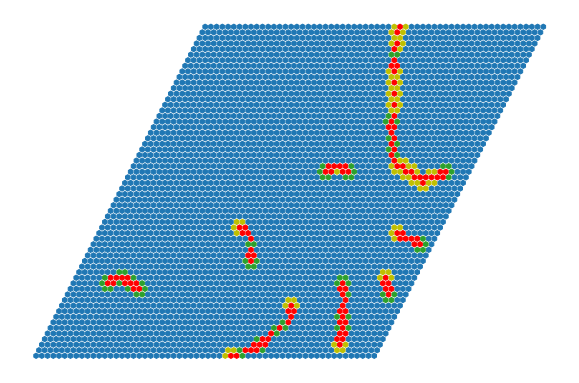

In [425]:
ax = draw_field5(game=game)
plt.savefig("triang_b02m.png")

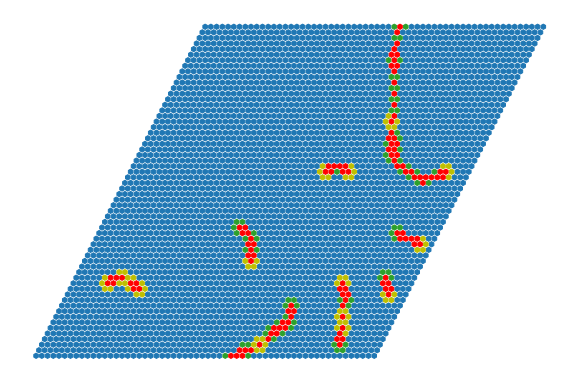

In [412]:
ax = draw_field5(game=game)

### $5/3 < b < 7/4$

Patterns are again periodic, with small jitter at the edges. Oscialltions are periodic with period of the order unity.

In [426]:
game = GameField(L, b=7/4-0.01)

rndm = np.random.RandomState(1235)
game.field = (rndm.uniform(size=(L, L)) < fraction_D).astype(int)
game.evolveT(n_therm)

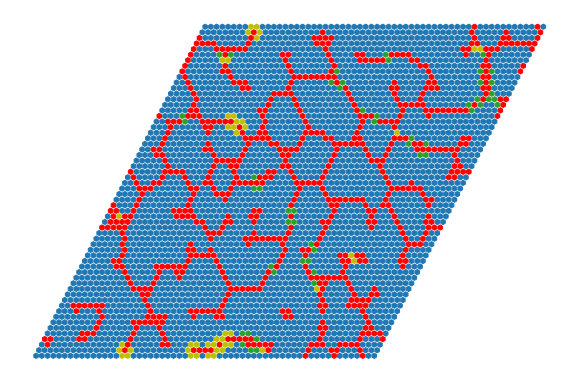

In [427]:
ax = draw_field5(game=game)
plt.savefig("triang_b074m.png")

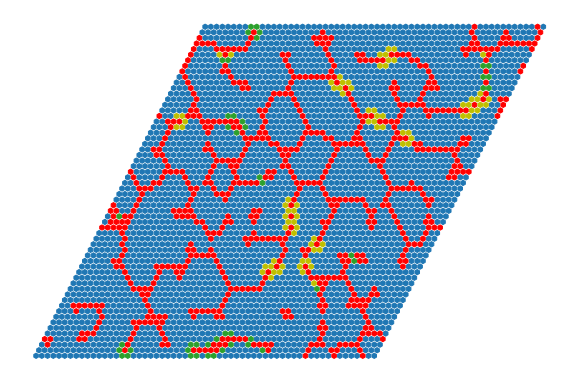

In [415]:
ax = draw_field5(game=game)